* ## **Import tools and primary data**

In [353]:
import pandas as pd
from pprint import pprint
df1 = pd.read_csv("usagers.csv")
df2 = pd.read_csv("vehicules.csv")
df3 = pd.read_csv("caract.csv")
df4 = pd.read_csv("lieux.csv")
print('Done')

Done


* ## **Merge original data**

In [354]:
data1 = df1.merge(df2,on=['Num_Acc','num_veh', 'id_vehicule'])
data2 = df3.merge(df4,on = 'Num_Acc')
data = data1.merge(data2,on='Num_Acc')

* ## **Missing values handling**

In [355]:
def cleansing(data_to_clean):
  print("=====================================================================")
  print("Dimension of the data : {}".format(data_to_clean.shape))
  print("=====================================================================")
  print(repr("Columns with more than 10% of missing values  :"))
  # count nan values
  nan_values = data_to_clean.isna().sum()
  # percentage of nan values ay column
  nan_values = nan_values.sort_values(ascending=False) *100 / data_to_clean.shape[0]
  # columns with nan values greater than 10%
  nan_values = nan_values.loc[nan_values > 10]
  print(nan_values)
  # Drop nan_values criteria columns
  data = data_to_clean.drop(nan_values.to_dict().keys(), axis=1)
  # Drop other column not concerned or not making sens in the process
  data = data.drop(['lat','secu1', 'secu2', 'secu3'], axis=1)
  print("=====================================================================")
  
  print("Processing the hrmn variable...")
  data.hrmn = data.hrmn.str.split(':').str[0]
  print("=====================================================================")
  
  print('Dimension of the data after dropping the variables with NaN more than 10% : {}'.format(data.shape))
  print("=====================================================================")
  
  print("Variables conversion in Category type...")
  cat = ['lum', 'agg', 'int', 'atm', 'col',
        'catr', 'circ', 'vosp', 'prof', 
       'plan', 'surf', 'infra', 'situ', 'senc',
       'catv', 'obs', 'obsm', 'choc', 'manv', 
       'catu', 'sexe', 'trajet', 'actp']

  data[cat] = data[cat].astype('category')
  
  drop = ['an_nais', 'motor', 'jour', 'mois', 'dep', 
        'com', 'adr', 'voie', 'nbv', 'pr', 'pr1',
        'Num_Acc', 'id_vehicule', 'num_veh']

  data = data.drop(drop, axis=1)
  
  print("=====================================================================")
  print("Variation of the variables...")
  print(data.var().sort_values().head())
  
  print("=====================================================================")
  data = data.drop('an', axis=1)
  print("Dimension of the data after dropping 'an' variable (No valuable informations) : {}".format(data.shape))
  
  print("=====================================================================")
  data = data.dropna(axis=0, how='any')
  print("Dimension of the data after dropping all rows with NaN: {}".format(data.shape))
  
  print("=====================================================================")

  print("**************************Cleansing done*****************************")
  print("=====================================================================")
  return data


In [356]:
data = cleansing(data)

Dimension of the data : (132977, 54)
'Columns with more than 10% of missing values  :'
long       100.000000
lartpc      99.648811
larrout     99.375080
occutc      98.587726
v2          92.673921
v1          18.567121
dtype: float64
Processing the hrmn variable...
Dimension of the data after dropping the variables with NaN more than 10% : (132977, 44)
Variables conversion in Category type...
Variation of the variables...
an       0.000000
etatp    0.420301
locp     1.556945
grav     1.881877
place    7.266928
dtype: float64
Dimension of the data after dropping 'an' variable (No valuable informations) : (132977, 29)
Dimension of the data after dropping all rows with NaN: (132883, 29)
**************************Cleansing done*****************************


### - Sampling problem handling (Improper balance of the data)

In [290]:
def merge_classes(clean_data, classes = 4):
    """Merge classes of the 'grav' variable to simplify the problem.

    Args:
        clean_data (dataframe): datarame of data already cleaned by the function cleansing()
        classes (int, optional): numbers of classes to convert the 'grav' variable. Defaults to 4.
                                4 : labels (1 = 'Indemme', 2 = 'Tué', 3 = 'Blessé hospitalisé', 4 = 'Blessé léger')
                                3 : labels (1 = 'Indemme', 2 = 'Tué', 3 = 'Blessé') --> Blessé = Need medical attention
                                2 : labels (1 = 'Survivants', 2 = 'Tué')

    Returns:
        dataframe : dataframe with the 'grav' variable with the number of classes specified.
    """
    # df = clean_data.copy()
    if classes == 4 :
        df_c4 = clean_data.copy()
        print('Distibution between the {} classes : '.format(classes))
        print("labels (1 = 'Indemme', 2 = 'Tué', 3 = 'Blessé hospitalisé', 4 = 'Blessé léger')")
        print(df_c4.grav.value_counts())
        print("=========================================================")
        return df_c4
    elif classes == 3 :
        df_c3 = clean_data.copy()
        print('Distibution between the {} classes : '.format(classes))
        print("labels (1 = 'Indemme', 2 = 'Tué', 3 = 'Blessé') --> Blessé = Need medical attention")
        df_c3.grav.replace(4, 3, inplace=True)
        print(df_c3.grav.value_counts())
        print("=========================================================")
        return df_c3
    elif classes == 2 :
        df_c2 = clean_data.copy()
        print('Distibution between the {} classes : '.format(classes))
        print("labels (1 = 'Survivant', 2 = 'Tué')")
        df_c2.grav.replace(4, 1, inplace=True)
        df_c2.grav.replace(3, 1, inplace=True)
        print(df_c2.grav.value_counts())
        print("=========================================================")
        return df_c2
    else : 
        print("Insert a valid option")
        print("=========================================================")
    

In [291]:
data4 = merge_classes(data, classes = 4)
data3 = merge_classes(data, classes = 3)
data2 = merge_classes(data, classes = 2)

Distibution between the 4 classes : 
labels (1 = 'Indemme', 2 = 'Tué', 3 = 'Blessé hospitalisé', 4 = 'Blessé léger')
1    55276
4    53256
3    20854
2     3497
Name: grav, dtype: int64
Distibution between the 3 classes : 
labels (1 = 'Indemme', 2 = 'Tué', 3 = 'Blessé') --> Blessé = Need medical attention
3    74110
1    55276
2     3497
Name: grav, dtype: int64
Distibution between the 2 classes : 
labels (1 = 'Survivant', 2 = 'Tué')
1    129386
2      3497
Name: grav, dtype: int64


In [283]:
data4.grav.unique()

array([4, 1, 3, 2], dtype=int64)

In [292]:
y4 = data4.grav
X4 = data4.drop(columns='grav')
y3 = data3.grav
X3 = data3.drop(columns='grav')
y2 = data2.grav
X2 = data2.drop(columns='grav')

#### Using undersampling methods (imblearn)

In [20]:
# Install imblearn
# !pip install imblearn

In [299]:
import numpy as np
from pprint import pprint
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score

In [307]:
def underSamp(X, y):
    rus = RandomUnderSampler(random_state=42, replacement=True)
    X_rus, y_rus = rus.fit_resample(X, y)
    print('Original dataset shape:', Counter(y))
    print('Resample dataset shape', Counter(y_rus))
    return X_rus, y_rus

In [313]:
X, y = underSamp(X3, y3)

Original dataset shape: Counter({3: 74110, 1: 55276, 2: 3497})
Resample dataset shape Counter({1: 3497, 2: 3497, 3: 3497})


In [315]:
# hot encoding of the features
X = pd.get_dummies(X.astype(str))

# Normalizing the data
X = normalize(X.values)

# Splitting the data for training and test purpose
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size= .3)


<span style = 'color : red'>===================================================================<span>

# Logistic regression

In [316]:
# Importation du module
from sklearn.linear_model import LogisticRegression
# Entrainnement du modèle
logreg = LogisticRegression()


In [317]:
model_reg = logreg.fit(X_train, y_train)

C:\Users\bsully\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [318]:
model_reg_score = model_reg.score(X_test, y_test)
print('Base Regression Model Score : {:04.3f}'.format(model_reg_score))

Base Regression Model Score : 0.660


<span style = 'color : yellow'>===================================================================<span>

In [319]:
# Predictions (test set)
predictions_test_reg = model_reg.predict(X_test)



              precision    recall  f1-score   support

           1      0.712     0.786     0.747      1063
           2      0.672     0.693     0.682      1054
           3      0.578     0.499     0.535      1031

    accuracy                          0.660      3148
   macro avg      0.654     0.659     0.655      3148
weighted avg      0.655     0.660     0.656      3148



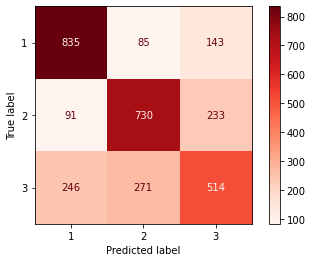

In [320]:
from sklearn.metrics import classification_report, plot_confusion_matrix
disp = plot_confusion_matrix(model_reg,
                             X_test,
                             y_test,
                             cmap='Reds',
                             values_format='d'
                             )
print("")
print(classification_report(y_test, 
                            predictions_test_reg, 
                            digits=3, 
                            zero_division = 1
                            )
      )

# Hyperparameters tuning

In [321]:
# Look at parameters used by our current base forest
print('Parameters currently in use :')
pprint(model_reg.get_params())

Parameters currently in use :
{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [322]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {
        'penalty' : ["l2", 'elasticnet', 'l1'],
        'C' : np.logspace(-4, 5, 5),
        'solver': ['saga']
    }
]


In [323]:
grid_reg = GridSearchCV(model_reg, 
                       param_grid, 
                       cv = 2
                       )

In [ ]:
# Entrainnement du modèle optimisé
best_grid_reg = grid_reg.fit(X_train, y_train)

In [325]:
# Présentation des paramètres du modèle optimal
print("Parmètres optimisés : ",best_grid_reg.best_params_)

Parmètres optimisés :  {'C': 3.1622776601683795, 'penalty': 'l1', 'solver': 'saga'}


In [326]:
best_reg_model = best_grid_reg.best_estimator_
best_reg_pred = best_reg_model.predict(X_test)

              precision    recall  f1-score   support

           1      0.718     0.805     0.759      1063
           2      0.688     0.692     0.690      1054
           3      0.579     0.503     0.539      1031

    accuracy                          0.668      3148
   macro avg      0.662     0.667     0.663      3148
weighted avg      0.662     0.668     0.664      3148



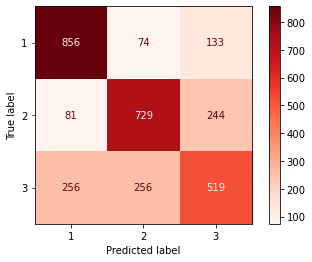

In [327]:
print(classification_report(y_test, 
                            best_reg_pred, 
                            digits = 3, 
                            zero_division = 1
                            )
      )
disp = plot_confusion_matrix(best_reg_model, 
                             X_test, 
                             y_test, 
                             cmap='Reds', 
                             values_format='d'
                             )

<span style = 'color : red'>===================================================================<span>

# Random forest

In [328]:
# Default Random forest
rf = RandomForestClassifier(random_state=42)

# fitting 
model_rf = rf.fit(X_train, y_train)

# Predictions (test)
predictions_test = model_rf.predict(X_test)


In [329]:

print('Trainning accuracy : {:04.3f}'.format(model_rf.score(X_train, y_train)))
print('Test accuracy  : {:04.3f}'.format(model_rf.score(X_test, y_test)))

Trainning accuracy : 0.999
Test accuracy  : 0.668


              precision    recall  f1-score   support

           1      0.724     0.777     0.750      1063
           2      0.680     0.722     0.700      1054
           3      0.581     0.500     0.538      1031

    accuracy                          0.668      3148
   macro avg      0.662     0.667     0.663      3148
weighted avg      0.662     0.668     0.664      3148



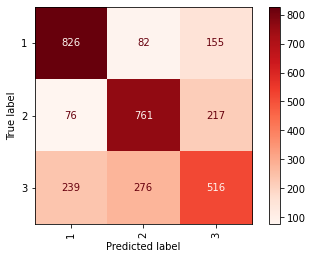

In [332]:
from sklearn.metrics import plot_confusion_matrix, classification_report
# labels_disp = ["Indemne", "Tué", "Hospitalisé", "Blessé léger"]
print(classification_report(y_test, predictions_test, digits=3, zero_division = 1)),
disp = plot_confusion_matrix(model_rf, 
                             X_test, 
                             y_test, 
                             cmap='Reds', 
                             values_format='d',
                            #  display_labels=labels_disp,
                             xticks_rotation= 'vertical'
                             )

# Hyperarameters tuning for Random Forest

In [333]:
# Look at parameters used by our current base forest
print('Parameters currently in use :')
pprint(model_rf.get_params())

Parameters currently in use :
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [334]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200,400, 500]
}

# Instantiate the grid search model
rf_grid = GridSearchCV(estimator = model_rf, 
                           param_grid = param_grid,
                           cv = 5, n_jobs=-1)

In [335]:
# Fit the grid search to the data
best_rf_grid = rf_grid.fit(X_train, y_train)

In [336]:
print('Ramdom Forest model best parameters :')
pprint(best_rf_grid.best_params_)

Ramdom Forest model best parameters :
{'n_estimators': 500}


In [337]:
best_rf_model = best_rf_grid.best_estimator_
best_rf_pred = best_rf_model.predict(X_test)

In [338]:

print('Accuracy on test set (model_rf) : {:04.3f}'.format(best_rf_model.score(X_test, y_test)))

Accuracy on test set (model_rf) : 0.674


              precision    recall  f1-score   support

           1      0.737     0.784     0.760      1063
           2      0.684     0.724     0.703      1054
           3      0.583     0.510     0.544      1031

    accuracy                          0.674      3148
   macro avg      0.668     0.673     0.669      3148
weighted avg      0.669     0.674     0.670      3148



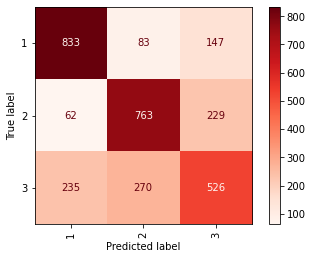

In [339]:
print(classification_report(y_test, best_rf_pred, 
                            digits=3, zero_division = 1))

disp = plot_confusion_matrix(best_rf_model, 
                             X_test, 
                             y_test, 
                             cmap='Reds', 
                             values_format='d',
                            #  display_labels=labels_disp,
                             xticks_rotation='vertical')

# Extreme Gradient Boosting

In [341]:
# On redécoupe la base en train/test

# X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_N_data, y, random_state=42, test_size=.3)


# On crée le modèle :

xgb = GradientBoostingClassifier()

model_xgb = xgb.fit(X, y)
print("Done")

Done


In [343]:

# On calcul les prédictions
predictions_test_xgb = model_xgb.predict(X_test)
predictions_train_xgb = model_xgb.predict(X_train)

In [344]:
print('Accuracy on test set : {:04.3f}'.format(model_xgb.score(X_test, y_test)))

train_acc = accuracy_score(y_train, predictions_train_xgb)
print('Accuracy on train set : {:04.3f}'.format(train_acc))

Accuracy on test set : 0.700
Accuracy on train set : 0.705


              precision    recall  f1-score   support

           1      0.734     0.826     0.777      1063
           2      0.704     0.737     0.720      1054
           3      0.647     0.532     0.584      1031

    accuracy                          0.700      3148
   macro avg      0.695     0.698     0.694      3148
weighted avg      0.695     0.700     0.695      3148



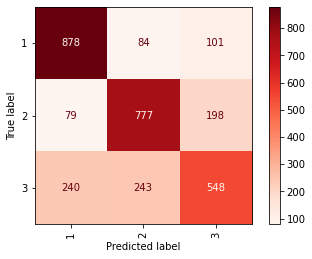

In [345]:
print(classification_report(y_test, predictions_test_xgb, digits=3))
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(model_xgb, X_test, y_test, 
                             cmap='Reds', values_format='d', 
                            #  display_labels=labels_disp,
                             xticks_rotation= 'vertical')

# Hyperparameter tuning

In [346]:
model_xgb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [347]:

param_grid = {
    'n_estimators' : [100, 200, 300]
}

# Instantiate the grid search model

xgb_grid = GridSearchCV(estimator = model_xgb, 
                           param_grid = param_grid,
                           cv = 2, n_jobs=-1)

In [348]:
best_xgb_model = xgb_grid.fit(X_train, y_train)

In [349]:

best_xgb_model.best_estimator_

GradientBoostingClassifier(n_estimators=300)

In [350]:

print('Accuracy on test set : {:04.3f}'.format(best_xgb_model.score(X_test_xgb, y_test_xgb)))

NameError: name 'X_test_xgb' is not defined

# Questions
## 1. Comment les modalites avec les petites representations vont affecter le modele?
## 2. Quels sont les algos de classifications qu'on peut encore essayer pour ameliorer?
## 3. Prisen en comptes des suggestions se l'article, comment s'y prendre? (https://larevueia.fr/xgboost-vs-random-forest-predire-la-gravite-dun-accident-de-la-route/)
## 4. Suggestions?

#svm

In [ ]:
##### Création de notre modèle SVM

In [ ]:
X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(X_N_data, y, test_size=0.3)

In [ ]:
print(len(X_train_SVM),' samples in training data\n',
      len(X_test_SVM),' samples in test data\n', )

8738  samples in training data
 3746  samples in test data



In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 42) # kernel linéaire
classifier.fit(X_train_SVM, y_train_SVM)

SVC(kernel='linear', random_state=42)

# Faire la prédiction

In [ ]:
y_pred1 = classifier.predict(X_test_SVM)

In [ ]:
# Evaluer le modèle

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_SVM, y_pred1))
print(classification_report(y_test_SVM, y_pred1, digits=3))

[[716  48  67  97]
 [ 73 537 214 109]
 [ 93 285 310 242]
 [277  97 107 474]]
              precision    recall  f1-score   support

           1      0.618     0.772     0.686       928
           2      0.555     0.576     0.565       933
           3      0.444     0.333     0.381       930
           4      0.514     0.496     0.505       955

    accuracy                          0.544      3746
   macro avg      0.533     0.544     0.534      3746
weighted avg      0.533     0.544     0.534      3746



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


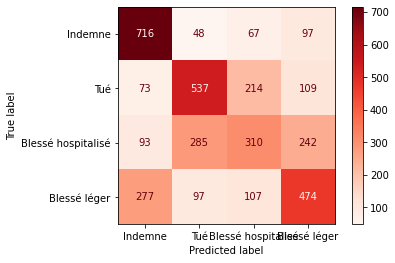

In [ ]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(classifier, 
                             X_test_SVM, 
                             y_test_SVM, 
                             cmap='Reds', 
                             values_format='d',
                             display_labels = ["Indemne", "Tué", "Blessé hospitalisé", "Blessé léger"])

# KNN

In [ ]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn= train_test_split(X_N_data, y, random_state=42, test_size=.3)

In [ ]:
print(len(X_train_knn),' samples in training data\n',
      len(X_test_knn),' samples in test data\n', )

8738  samples in training data
 3746  samples in test data



In [ ]:
# Learning
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() # définition de l'estimateur
model_knn = knn.fit(X_train_knn, y_train_knn) # apprentissage (estimation du modèle)

In [ ]:
model_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
print('Base KNN accuracy :{:04.3f}'.format(model_knn.score(X_test_knn, y_test_knn)))


Base KNN accuracy :0.503


In [ ]:
knn_pred = model_knn.predict(X_test_knn)
print(classification_report(y_test_knn, 
                            knn_pred, 
                            digits=3, 
                            target_names=labels_disp))

              precision    recall  f1-score   support

     Indemne      0.572     0.703     0.631       943
         Tué      0.530     0.554     0.541       966
 Hospitalisé      0.401     0.403     0.402       900
Blessé léger      0.480     0.344     0.400       937

    accuracy                          0.503      3746
   macro avg      0.496     0.501     0.494      3746
weighted avg      0.497     0.503     0.495      3746



# tuning

In [ ]:
param_grid = {
    'n_neighbors': [5, 7, 10]
}

# Instantiate the grid search model

knn_grid = GridSearchCV(estimator = model_knn, 
                           param_grid = param_grid,
                           cv = 2, n_jobs=-1)

In [ ]:
best_grid_knn = knn_grid.fit(X_train_knn, y_train_knn)

In [ ]:
best_grid_knn.get_params()

{'cv': 2,
 'error_score': nan,
 'estimator': KNeighborsClassifier(),
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'n_jobs': -1,
 'param_grid': {'n_neighbors': [5, 7, 10]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [ ]:
print('Accuracy on test set : {:04.3f}'.format(best_grid_knn.score(X_test_knn, y_test_knn)))


Accuracy on test set : 0.512


# Imporper balanced data
https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/